In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("../data/raw/diabetes_raw.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
cols_with_zero_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[cols_with_zero_missing] = df[cols_with_zero_missing].replace(0, np.nan)

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
for col in cols_with_zero_missing:
    df[col] = df[col].fillna(df[col].median())

In [6]:
import os
os.makedirs("../data/processed", exist_ok=True)

df.to_csv("../data/processed/diabetes_clean.csv", index=False)

print("Diabetes cleaned dataset saved at: ../data/processed/diabetes_clean.csv")

Diabetes cleaned dataset saved at: ../data/processed/diabetes_clean.csv


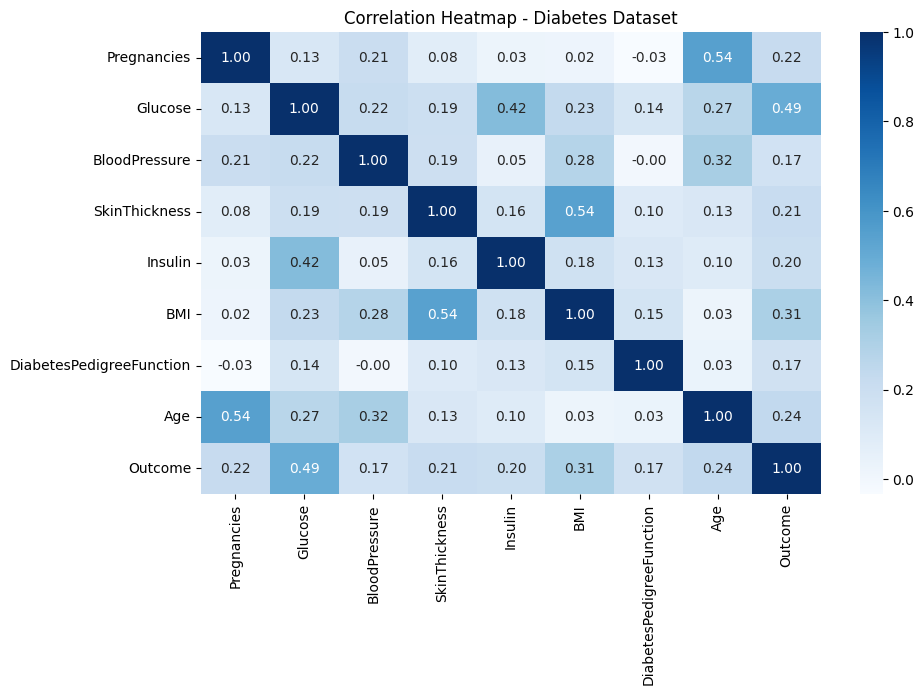

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap - Diabetes Dataset")
plt.show()

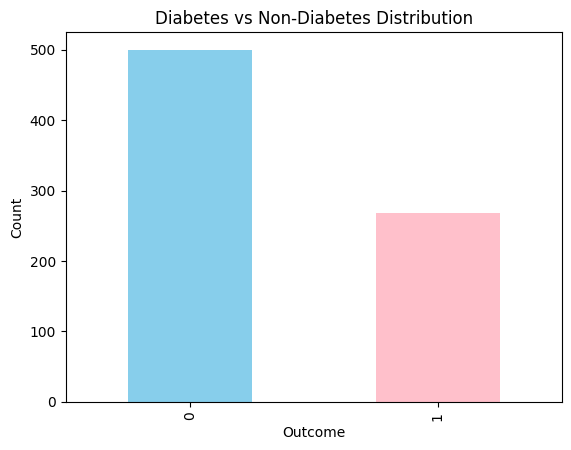

In [8]:
df["Outcome"].value_counts().plot(kind="bar", color=["skyblue","pink"])
plt.title("Diabetes vs Non-Diabetes Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

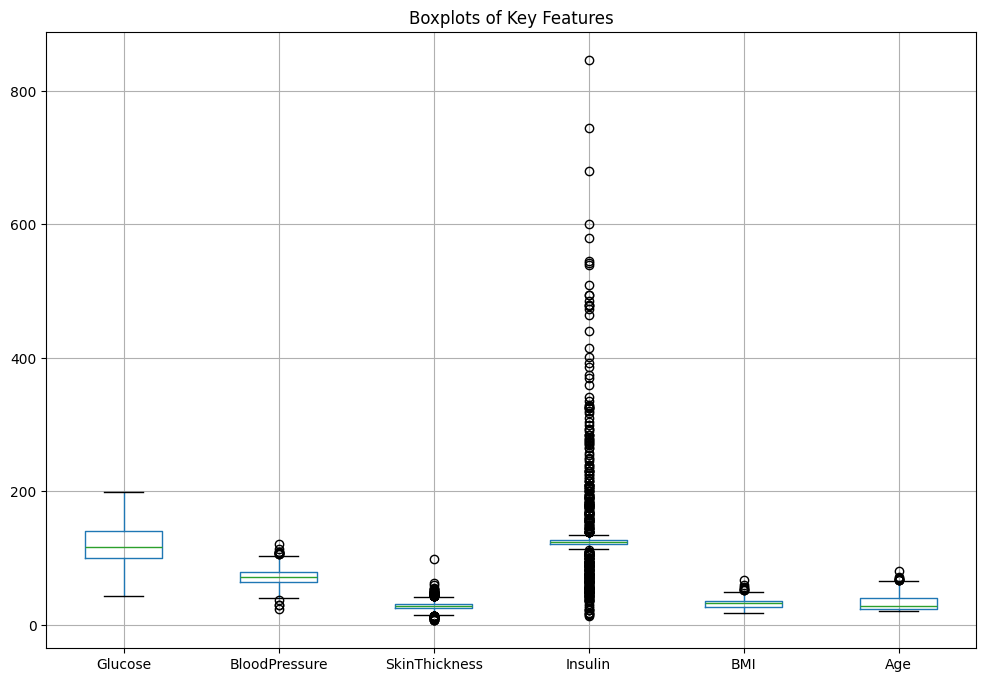

In [9]:
features = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI","Age"]

plt.figure(figsize=(12,8))
df[features].boxplot()
plt.title("Boxplots of Key Features")
plt.show()

In [10]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((614, 8), (154, 8))

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
df["BMI_Squared"] = df["BMI"] ** 2
df["Age_BMI"] = df["Age"] * df["BMI"]
df["Insulin_Glucose_Ratio"] = df["Insulin"] / (df["Glucose"] + 1)
df["SkinThickness_Age"] = df["SkinThickness"] * df["Age"]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Squared,Age_BMI,Insulin_Glucose_Ratio,SkinThickness_Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1128.96,1680.0,0.838926,1750.0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,707.56,824.6,1.453488,899.0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,542.89,745.6,0.679348,928.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,789.61,590.1,1.044444,483.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1857.61,1422.3,1.217391,1155.0


In [13]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
df.to_csv("../data/processed/diabetes_clean.csv", index=False)
print("Updated diabetes dataset saved.")

Updated diabetes dataset saved.


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}

results = {}

for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }

results

{'Logistic Regression': {'Accuracy': 0.7467532467532467,
  'Precision': 0.6481481481481481,
  'Recall': 0.6363636363636364,
  'F1 Score': 0.6422018348623854,
  'ROC-AUC': 0.8165289256198347},
 'Random Forest': {'Accuracy': 0.7337662337662337,
  'Precision': 0.625,
  'Recall': 0.6363636363636364,
  'F1 Score': 0.6306306306306306,
  'ROC-AUC': 0.8212121212121213},
 'XGBoost': {'Accuracy': 0.7207792207792207,
  'Precision': 0.59375,
  'Recall': 0.6909090909090909,
  'F1 Score': 0.6386554621848739,
  'ROC-AUC': 0.7939393939393938}}

In [18]:
import pickle
import os
import shap

# Train final XGBoost model on full training data
final_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

final_model.fit(X_train_scaled, y_train)

# Make directory for saving
os.makedirs("../ML/models_saved", exist_ok=True)

MODEL_PATH = "../ML/models_saved/diabetes_xgboost.pkl"
SCALER_PATH = "../ML/models_saved/diabetes_scaler.pkl"

# Save model
with open(MODEL_PATH, "wb") as f:
    pickle.dump(final_model, f)

# Save scaler
with open(SCALER_PATH, "wb") as f:
    pickle.dump(scaler, f)

print("Model & scaler saved successfully!")
print("Model:", MODEL_PATH)
print("Scaler:", SCALER_PATH)

Model & scaler saved successfully!
Model: ../ML/models_saved/diabetes_xgboost.pkl
Scaler: ../ML/models_saved/diabetes_scaler.pkl


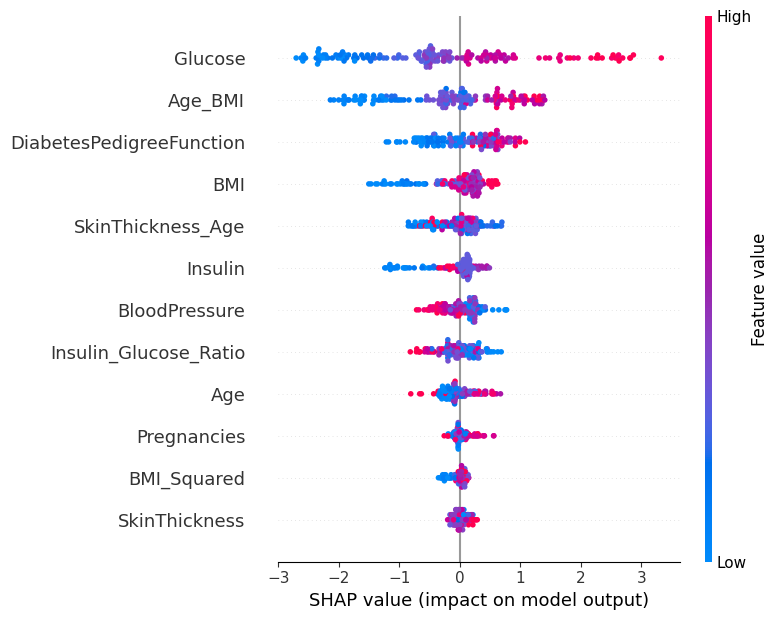

In [19]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test_scaled)

# Summary Plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

In [21]:
import os
import matplotlib.pyplot as plt
import shap

# Create directory
os.makedirs("../visualizations/diabetes", exist_ok=True)

# -----------------------------
# 1. SHAP SUMMARY PLOT
# -----------------------------
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=False)
plt.savefig("../visualizations/diabetes/shap_summary.png", dpi=300, bbox_inches="tight")
plt.close()


# -----------------------------
# 2. Feature Importance BAR Plot (OLD API)
# -----------------------------
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar", show=False)
plt.savefig("../visualizations/diabetes/feature_importance.png", dpi=300, bbox_inches="tight")
plt.close()


# -----------------------------
# 3. Dependence Plots
# -----------------------------
important_features = [
    "Glucose",
    "BMI",
    "Age_BMI",
    "Insulin",
    "SkinThickness_Age"
]

for feature in important_features:
    plt.figure(figsize=(8, 4))
    shap.dependence_plot(feature, shap_values, X_test_scaled, feature_names=X.columns, show=False)
    plt.title(f"SHAP Dependence Plot — {feature}")
    plt.savefig(f"../visualizations/diabetes/shap_{feature}.png", dpi=300, bbox_inches="tight")
    plt.close()

print("🔥 ALL SHAP images exported successfully without errors!")


🔥 ALL SHAP images exported successfully without errors!


<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>